In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

In [4]:
in_data=pd.read_csv('HR-Employee-Attrition-data.csv')

In [6]:
in_data[:10]

,Employee Count,Employee ID,Department,Job Role,Attrition (Yes/No),Gender,Age,Over 18,Marital Status,Education,...,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Performance Rating,Relationship Satisfaction
0,1,1,Sales,Sales Executive,Yes,Female,41,Y,Single,College,...,8,6,4,0,5,Medium,0,Bad,Excellent,Low
1,1,2,Research & Development,Research Scientist,No,Male,49,Y,Married,Below College,...,10,10,7,1,7,High,3,Better,Outstanding,Very High
2,1,4,Research & Development,Laboratory Technician,Yes,Male,37,Y,Single,College,...,7,0,0,0,0,Very High,3,Better,Excellent,Medium
3,1,5,Research & Development,Research Scientist,No,Female,33,Y,Married,Master,...,8,8,7,3,0,Very High,3,Better,Excellent,High
4,1,7,Research & Development,Laboratory Technician,No,Male,27,Y,Married,Below College,...,6,2,2,2,2,Low,3,Better,Excellent,Very High
5,1,8,Research & Development,Laboratory Technician,No,Male,32,Y,Single,College,...,8,7,7,3,6,Very High,2,Good,Excellent,High
6,1,10,Research & Development,Laboratory Technician,No,Female,59,Y,Married,Bachelor,...,12,1,0,0,0,High,3,Good,Outstanding,Low
7,1,11,Research & Development,Laboratory Technician,No,Male,30,Y,Divorced,Below College,...,1,1,0,0,0,Very High,2,Better,Outstanding,Medium
8,1,12,Research & Development,Manufacturing Director,No,Male,38,Y,Single,Bachelor,...,10,9,7,1,8,Very High,2,Better,Outstanding,Medium
9,1,13,Research & Development,Healthcare Representative,No,Male,36,Y,Married,Bachelor,...,17,7,7,7,7,High,3,Good,Excellent,Medium


In [66]:
columns=in_data.columns.values.tolist()
columns

['Department',
 'Job Role',
 'Gender',
 'Age',
 'Marital Status',
 'Education',
 'Business Travel',
 'Distance From Home (kms)',
 'Job Involvement',
 'Job Level',
 'Job Satisfaction',
 'Monthly Income (USD)',
 'Salary Hike (%)',
 'Over Time',
 'No. of Companies Worked',
 'Total Working Years',
 'Years At Company',
 'Years In Current Role',
 'Years Since Last Promotion',
 'Years With Curr Manager',
 'Environment Satisfaction',
 'Training Times Last Year',
 'Work Life Balance',
 'Performance Rating']

In [69]:
for i in range(len(y)):
    if(in_data['Monthly Income (USD)'][i]<=5000):
        in_data['Monthly Income (USD)'][i]=1
    elif(in_data['Monthly Income (USD)'][i]>5000 and in_data['Monthly Income (USD)'][i]<=10000):
        in_data['Monthly Income (USD)'][i]=2
    elif(in_data['Monthly Income (USD)'][i]>10000 and in_data['Monthly Income (USD)'][i]<=15000):
        in_data['Monthly Income (USD)'][i]=3
    else:
        in_data['Monthly Income (USD)'][i]=4

In [70]:
in_data['Monthly Income (USD)'].value_counts()

1    1337
4     133
Name: Monthly Income (USD), dtype: int64

In [20]:
y=in_data['Attrition (Yes/No)']
y[:10]

0    Yes
1     No
2    Yes
3     No
4     No
5     No
6     No
7     No
8     No
9     No
Name: Attrition (Yes/No), dtype: object

In [23]:
target=[]
for i in range(len(y)):
    if(y[i]=='Yes'):
        y[i]=1
    else:
        y[i]=0

In [43]:
for i in range(len(y)):
    if(in_data['Salary Hike (%)'][i]<=15):
        in_data['Salary Hike (%)'][i]=1
    elif(in_data['Salary Hike (%)'][i]>15 and in_data['Salary Hike (%)'][i]<=20):
        in_data['Salary Hike (%)'][i]=2
    else:
        in_data['Salary Hike (%)'][i]=3

In [167]:
for i in range(len(y)):
    if(in_data['Years With Curr Manager'][i]<=5):
        in_data['Years With Curr Manager'][i]=1
    elif(in_data['Years With Curr Manager'][i]>5 and in_data['Years With Curr Manager'][i]<=10):
        in_data['Years With Curr Manager'][i]=2
    else:
        in_data['Years With Curr Manager'][i]=3

In [45]:
#Total Working Years
for i in range(len(y)):
    if(in_data['Total Working Years'][i]<=10):
        in_data['Total Working Years'][i]=1
    elif(in_data['Total Working Years'][i]>10 and in_data['Total Working Years'][i]<=20):
        in_data['Total Working Years'][i]=2
    elif(in_data['Total Working Years'][i]>20 and in_data['Total Working Years'][i]<=30):
        in_data['Total Working Years'][i]=3
    else:
        in_data['Total Working Years'][i]=4

In [149]:
# Years At Company
for i in range(len(y)):
    if(in_data['Years At Company'][i]<=10):
        in_data['Years At Company'][i]=1
    elif(in_data['Years At Company'][i]>10 and in_data['Years At Company'][i]<=20):
        in_data['Years At Company'][i]=2
    elif(in_data['Years At Company'][i]>20 and in_data['Years At Company'][i]<=30):
        in_data['Years At Company'][i]=3
    else:
        in_data['Years At Company'][i]=4

In [46]:
for i in range(len(y)):
    if(in_data['Years In Current Role'][i]<=5):
        in_data['Years In Current Role'][i]=1
    elif(in_data['Years In Current Role'][i]>5 and in_data['Years In Current Role'][i]<=10):
        in_data['Years In Current Role'][i]=2
    elif(in_data['Years In Current Role'][i]>10 and in_data['Years In Current Role'][i]<=15):
        in_data['Years In Current Role'][i]=3
    else:
        in_data['Years In Current Role'][i]=4

In [44]:
for i in range(len(y)):
    if(in_data['No. of Companies Worked'][i]<=5):
        in_data['No. of Companies Worked'][i]=1
    else:
        in_data['No. of Companies Worked'][i]=2

In [47]:
for i in range(len(y)):
    if(in_data['Years Since Last Promotion'][i]<=5):
        in_data['Years Since Last Promotion'][i]=1
    elif(in_data['Years Since Last Promotion'][i]>5 and in_data['Years Since Last Promotion'][i]<=10):
        in_data['Years Since Last Promotion'][i]=2
    else:
        in_data['Years Since Last Promotion'][i]=3

In [41]:
in_data=in_data.drop(['Hourly Rate (USD)','Daily Rate (USD)','Monthly Rate (USD)','Standard Hours','Employee ID','Employee Count'],axis=1)
print(in_data.shape)

(1470, 28)


In [52]:
in_data=in_data.drop(['Attrition (Yes/No)','Stock Option Level','Relationship Satisfaction'],axis=1)
print(in_data.shape)

(1470, 25)


In [56]:
in_data=in_data.drop(['Education Field'],axis=1)
print(in_data.shape)

(1470, 24)


In [168]:
from sklearn.preprocessing import OneHotEncoder

model=OneHotEncoder(handle_unknown='ignore')
fin_data=model.fit_transform(in_data)
ext_feat=model.get_feature_names()

In [169]:
ext_feat

array(['x0_Human Resources', 'x0_Research & Development', 'x0_Sales',
       'x1_Healthcare Representative', 'x1_Human Resources',
       'x1_Laboratory Technician', 'x1_Manager',
       'x1_Manufacturing Director', 'x1_Research Director',
       'x1_Research Scientist', 'x1_Sales Executive',
       'x1_Sales Representative', 'x2_Female', 'x2_Male', 'x3_1', 'x3_2',
       'x3_3', 'x3_4', 'x4_Divorced', 'x4_Married', 'x4_Single',
       'x5_Bachelor', 'x5_Below College', 'x5_College', 'x5_Doctor',
       'x5_Master', 'x6_Non-Travel', 'x6_Travel_Frequently',
       'x6_Travel_Rarely', 'x7_1', 'x7_2', 'x7_3', 'x7_4', 'x8_High',
       'x8_Low', 'x8_Medium', 'x8_Very High', 'x9_1', 'x9_2', 'x9_3',
       'x9_4', 'x9_5', 'x10_High', 'x10_Low', 'x10_Medium',
       'x10_Very High', 'x11_1', 'x11_4', 'x12_1', 'x12_2', 'x12_3',
       'x13_No', 'x13_Yes', 'x14_1', 'x14_2', 'x15_1', 'x15_2', 'x15_3',
       'x15_4', 'x16_1', 'x16_2', 'x16_3', 'x16_4', 'x17_1', 'x17_2',
       'x17_3', 'x17_4', 

In [170]:
type(fin_data)
fin_data[0,:10]

<1x10 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [171]:
from sklearn.preprocessing import MaxAbsScaler
pre_mod=MaxAbsScaler().fit(fin_data)
std_train=pre_mod.transform(fin_data)
print(std_train.shape)

(1470, 90)


In [172]:
y=y.astype('int')

In [208]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

lr=LogisticRegression(random_state=42,n_jobs=-1,class_weight='balanced')
selector=RFE(estimator=lr,n_features_to_select=15)
final=selector.fit_transform(std_train,y)

In [209]:
ranks=selector.ranking_
top_ranks_ind=ranks.argsort()[::-1][:16]
final
#top_ranks_ind

<1470x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3182 stored elements in Compressed Sparse Row format>

In [183]:
final_train=fin_data[:1200]
final_test=fin_data[1200:]
y_train=y[:1200]
y_test=y[1200:]

In [184]:
final_train

<1200x90 sparse matrix of type '<class 'numpy.float64'>'
	with 28800 stored elements in Compressed Sparse Row format>

In [185]:
from sklearn.linear_model import LogisticRegression
from prettytable import PrettyTable
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV,TimeSeriesSplit
from sklearn.metrics import make_scorer, accuracy_score,average_precision_score,roc_auc_score

lr=LogisticRegression(random_state=42,n_jobs=-1,class_weight='balanced')
parameter={'C':[0.0001,0.001,0.01,0.1,1.0,10.0,100.0,1000.0],'penalty':['l1','l2']}
tss=TimeSeriesSplit(n_splits=5).split(final_train)
score=make_scorer(f1_score,average='weighted')

gscv=GridSearchCV(estimator=lr,scoring=score,cv=tss,param_grid=parameter,verbose=1)
gscv.fit(final_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    9.2s finished


GridSearchCV(cv=<generator object TimeSeriesSplit.split at 0x000000000E957410>,
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=-1, penalty='l2', random_state=42,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(f1_score, average=weighted), verbose=1)

In [186]:
print("Best Parameteres are as follows : ",gscv.best_params_)
print("Best Accuracy : %.2f%%"%(gscv.best_score_*100))
print(gscv.cv_results_['mean_test_score'].shape)

Best Parameteres are as follows :  {'C': 0.1, 'penalty': 'l2'}
Best Accuracy : 78.73%
(16,)


In [227]:
best_lr=LogisticRegression(C=0.1,penalty='l2',random_state=42,n_jobs=-1,class_weight='balanced')
best_lr.fit(final_train,y_train)
#test_bow=preprocessing.normalize(bow_test,norm='l1')
y_pred=best_lr.predict(final_test)
y_pred_train=best_lr.predict(final_train)


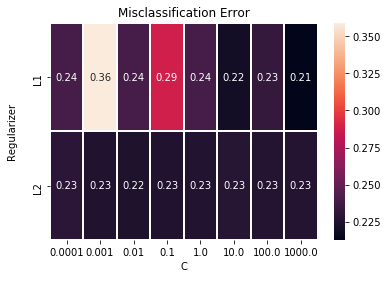

In [228]:
import seaborn as sn
y1=gscv.cv_results_['mean_test_score'][:8]
y2=gscv.cv_results_['mean_test_score'][8:]
y1=1-y1
y2=1-y2
heatmap = sn.heatmap([y1,y2], linewidths=1,# cmap=color,
                 xticklabels=[0.0001,0.001,0.01,0.1,1.0,10.0,100.0,1000.0], yticklabels=['L1','L2'],annot=True).set_title("Misclassification Error")
plt.xlabel("C\n")
plt.ylabel("Regularizer\n")
plt.show()

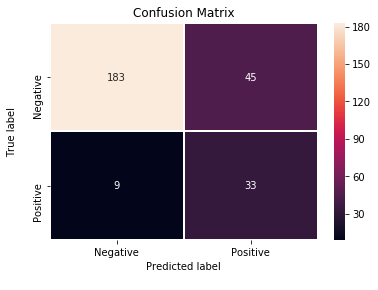

In [229]:
Conf_matrix=confusion_matrix(y_test, y_pred)
from matplotlib import *
import seaborn as sn
#color=sns.color_palette("Blues",6)
class_names=['Negative','Positive']
heatmap = sn.heatmap(Conf_matrix, linewidths=1,# cmap=color,
                 xticklabels=class_names, yticklabels=class_names,annot=True, fmt="d",).set_title("Confusion Matrix")
plt.xlabel("Predicted label\n")
plt.ylabel("True label\n")
plt.show()

In [237]:
y_pred_prob[0]

array([0.72313474, 0.27686526])

(270, 2)
270


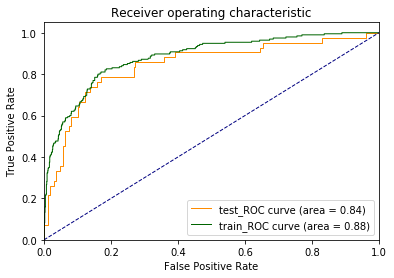

In [239]:
from sklearn.metrics import roc_curve, auc
y_pred_prob=best_lr.predict_proba(final_test)
y_pred_train_prob=best_lr.predict_proba(final_train)
print(y_pred_prob.shape)
print(len(y_test))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc = auc(fpr, tpr)

t_fpr, t_tpr, t_thresholds = roc_curve(y_train, y_pred_train_prob[:,1])
t_roc_auc = auc(t_fpr, t_tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='test_ROC curve (area = %0.2f)' % roc_auc)
plt.plot(t_fpr, t_tpr, color='darkgreen', lw=1, label='train_ROC curve (area = %0.2f)' % t_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [217]:
coeffecients=best_lr.coef_
ranks=coeffecients.argsort()[::-1][0,:16]
ranks

array([51, 38, 18, 36, 67, 26, 40, 72, 86, 45,  8, 76, 16,  6, 29,  1],
      dtype=int64)

In [240]:
col=ext_feat[ranks]
col

array(['x13_No', 'x9_2', 'x4_Divorced', 'x8_Very High', 'x18_1',
       'x6_Non-Travel', 'x9_4', 'x19_3', 'x22_Better', 'x10_Very High',
       'x1_Research Director', 'x20_Very High', 'x3_3', 'x1_Manager',
       'x7_1', 'x0_Research & Development'], dtype=object)

In [244]:
imp=[13,9,4,8,18,6,9,19,22,10,1,20,3,1,7,0]
name=[]
for i in imp:
    name.append(columns[i])
name

['Over Time',
 'Job Level',
 'Marital Status',
 'Job Involvement',
 'Years Since Last Promotion',
 'Business Travel',
 'Job Level',
 'Years With Curr Manager',
 'Work Life Balance',
 'Job Satisfaction',
 'Job Role',
 'Environment Satisfaction',
 'Age',
 'Job Role',
 'Distance From Home (kms)',
 'Department']

In [248]:
suffix=['No','2','Divorce','Very_High','<5','Non_travel','4','11_to_15','Better','Very_high','Research Director','Very_high','41_to_50','manager','<10km','Research & Development']
feat=[]
for i in range(len(suffix)):
    feat.append(name[i]+'='+suffix[i])
feat


['Over Time=No',
 'Job Level=2',
 'Marital Status=Divorce',
 'Job Involvement=Very_High',
 'Years Since Last Promotion=<5',
 'Business Travel=Non_travel',
 'Job Level=4',
 'Years With Curr Manager=11_to_15',
 'Work Life Balance=Better',
 'Job Satisfaction=Very_high',
 'Job Role=Research Director',
 'Environment Satisfaction=Very_high',
 'Age=41_to_50',
 'Job Role=manager',
 'Distance From Home (kms)=<10km',
 'Department=Research & Development']

In [249]:
coef=[]
for j in ranks:
    coef.append(coeffecients[0,j])

In [250]:
coeffecients[0,51]

-0.6731299504257658

In [251]:
coeff_df = pd.DataFrame({'Feature' : feat, 'Coefficient' : coef})

In [252]:
coeff_df

,Feature,Coefficient
0,Over Time=No,-0.673130
1,Job Level=2,-0.558898
2,Marital Status=Divorce,-0.520810
3,Job Involvement=Very_High,-0.492848
4,Years Since Last Promotion=<5,-0.464164
5,Business Travel=Non_travel,-0.450872
6,Job Level=4,-0.437384
7,Years With Curr Manager=11_to_15,-0.429537
8,Work Life Balance=Better,-0.426603
9,Job Satisfaction=Very_high,-0.426317
